# <span style="color:black"> LSN-Esercitazione numerica 6</span>


## <span style="color:blue">  Esercizio 06.1</span>

In questo esercizio sono andato a studiare un **modello di Ising 1D** attraverso l'algoritmo di Metropolis e di Gibbs.
L'hamiltoniana del sistema composto da N spin con interazione a primi vicini è la seguente (assumendo $\mu_B=1$ e $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}), 
$$

dove $\{ s_i \}_{i=1,N}$ sono spin che assumono valori in $\{-1;1\}$, $J>0$ (modello ferromagnetico) e $s_{N+1} = s_{1}$ come condizione al contorno periodica.

Ho aggiunto al codice fornito l'implementazione dell'algoritmo di Metropolis e quello di Gibbs per campionare il sistema con il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$ .  
Per l'**algoritmo di Metropolis** si è calcolata una probabilità di accettazione dell'inversione di uno spin, estratto casualmnete: $$p=min\left\{1, e^{-\beta\left(E_{new}-E_{old}\right)}\right\},$$
dove $E_{new}$ è il valore dell'energia avendo cambiato lo spin selezionato e $E_{old}$ è il valore dell'energia prima di invertire lo spin.  
L'**algoritmo di Gibbs** è stato implementato calcolando, per una posizione estratta casualmente, l'energia con configurazione di spin positivo $E_{up}$ e quella per un valore negativo $E_{down}$; si è poi scelto come valore di spin quello legato alla probabilità: 
$$p(\text{ + })=\frac{1}{ 1+e^{-\beta \left(E_{down}-E_{up}\right)} }$$
$$p(\text{ - })=1-p(\text{ + })$$
In particolare uno step Monte Carlo consiste nel tentativo di cambiare uno spin un numero di volte pari alla dimensioni del modello.

Si è inoltre andato ad equilibrare il sistema: per ogni set d'interesse si è eseguita una prima simulazione con configurazioni di spin causali e poi si è presa la configurazione finale come partenza della vera simulazione poi analizzata; per far questo si è implementata la possibilità di ripartenza leggendo come configurazione iniziale quella stampata sul file <font face="Courier">config.final</font>. dalla simulazione precedente.  Si mostrano, come esempio, due andamenti dell'energia interna a temperatura fissata in funzione del numero di blocchi; il valore della grandezza termodinamica va a stabilizzarsi all'aumentare dei blocchi, simbolo del fatto che il campionamento sta avvenendo con una probabilità proporzionale alla distribuzione d'interesse: il sistema è, quindi, equilibrato.

Studio poi le seguenti grandezze in funzione della temperatura in un range $\left[0.5,2.0\right]$ per un sistema con $N=50$, confrontandole con i valori analitici, ricavabili per un modello unidimensionale:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Per l'analisi è stata  utilizzata la media a blocchi utilizzando $10^4$ step Monte Carlo per ogni blocco, per evitare correlazioni, per un totale 200 blocchi. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xE, E, err_E = np.loadtxt('./Tmax/Gibbs/output.ene.0', usecols=(0,2,3), unpack='true')
xE2, E2, err_E2 = np.loadtxt('./Tmin/Metropolis/output.ene.0', usecols=(0,2,3), unpack='true')

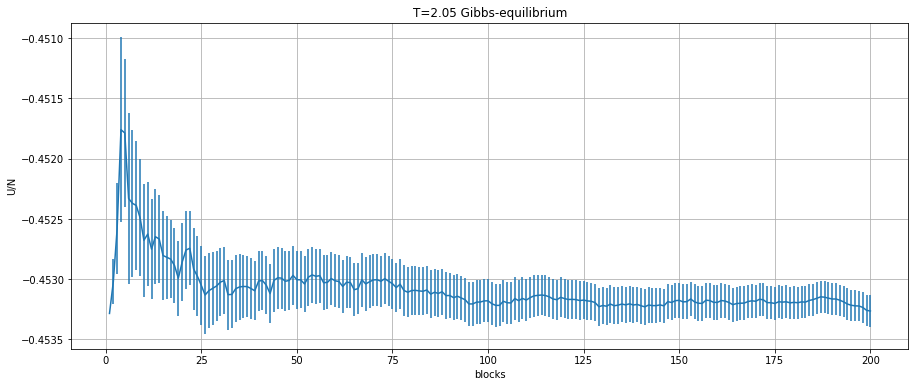

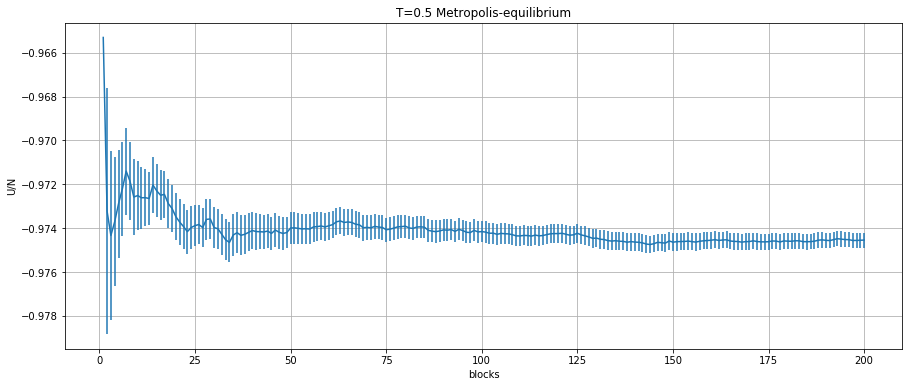

In [3]:
plt.figure(figsize=(15,6))
plt.errorbar(xE,E,yerr=err_E)
plt.grid(True)
plt.title("T=2.05 Gibbs-equilibrium")
plt.xlabel('blocks')
plt.ylabel('U/N')
plt.show()

plt.figure(figsize=(15,6))
plt.errorbar(xE2,E2,yerr=err_E2)
plt.grid(True)
plt.title("T=0.5 Metropolis-equilibrium")
plt.xlabel('blocks')
plt.ylabel('U/N')
plt.show()

In [10]:
Temp, e, err_e = np.loadtxt('./Metropolis/eneT_h0.res', usecols=(0,1,2), unpack='true')
Temp, c, err_c = np.loadtxt('./Metropolis/heatT_h0.res', usecols=(0,1,2), unpack='true')
Temp, m, err_m = np.loadtxt('./Metropolis/MagT_h.res', usecols=(0,1,2), unpack='true')
Temp, ki, err_ki = np.loadtxt('./Metropolis/ChiT_h0.res', usecols=(0,1,2), unpack='true')

Tempg, eg, err_eg = np.loadtxt('./Gibbs/eneT_h0.res', usecols=(0,1,2), unpack='true')
Tempg, cg, err_cg = np.loadtxt('./Gibbs/heatT_h0.res', usecols=(0,1,2), unpack='true')
Tempg, mg, err_mg = np.loadtxt('./Gibbs/MagT_h.res', usecols=(0,1,2), unpack='true')
Tempg, kig, err_kig = np.loadtxt('./Gibbs/ChiT_h0.res', usecols=(0,1,2), unpack='true')

In [11]:
T = np.linspace(0.4,2.1)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
h=0.02 #external field
e_true = -J*( th + ch*thN )/( 1 + thN )
heat_true=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
Mag_true = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)

X_true = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


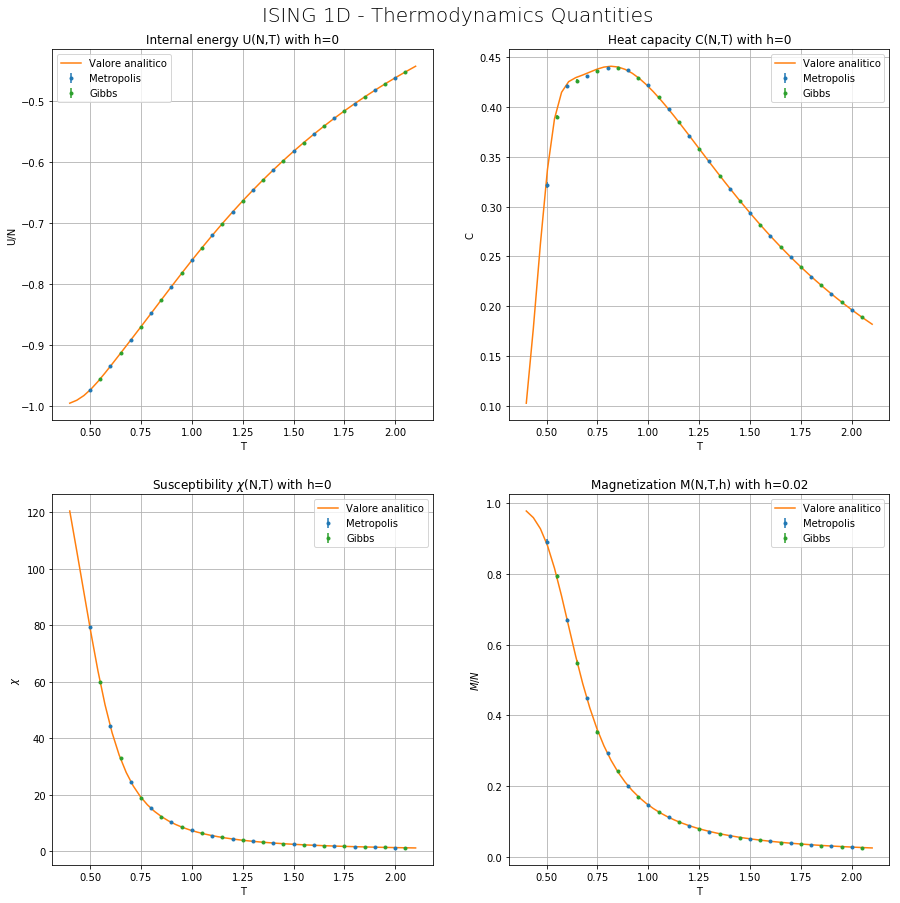

In [12]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 15))
fig.suptitle('ISING 1D - Thermodynamics Quantities', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

ax = fig.add_subplot(gs[0, 0])
plt.errorbar(Temp,e,yerr=err_e, label="Metropolis", fmt='o', markersize=3)
plt.plot(T,e_true, label="Valore analitico")
plt.errorbar(Tempg,eg,yerr=err_eg, label="Gibbs", fmt='o', markersize=3)
ax.legend()
ax.grid(True)
ax.set_title('Internal energy U(N,T) with h=0')
ax.set_xlabel('T')
ax.set_ylabel('U/N')

ax2 = fig.add_subplot(gs[0, 1])
plt.errorbar(Temp,c,yerr=err_c, label="Metropolis", fmt='o', markersize=3)
plt.plot(T,heat_true, label="Valore analitico")
plt.errorbar(Tempg,cg,yerr=err_cg, label="Gibbs", fmt='o', markersize=3)
ax2.legend()
ax2.set_title('Heat capacity C(N,T) with h=0')
ax2.set_xlabel('T')
ax2.set_ylabel('C')
ax2.grid(True)

ax3 = fig.add_subplot(gs[1, 0])
plt.errorbar(Temp,ki,yerr=err_ki, label="Metropolis", fmt='o', markersize=3)
plt.plot(T,X_true, label="Valore analitico")
plt.errorbar(Tempg,kig,yerr=err_kig, label="Gibbs", fmt='o', markersize=3)
ax3.legend()
ax3.grid(True)
ax3.set_title('Susceptibility $\chi$(N,T) with h=0')
ax3.set_xlabel('T')
ax3.set_ylabel('$\chi$')

ax4 = fig.add_subplot(gs[1, 1])
plt.errorbar(Temp,m,yerr=err_m, label="Metropolis", fmt='o', markersize=3)
plt.plot(T,Mag_true, label="Valore analitico")
plt.errorbar(Tempg,mg,yerr=err_mg, label="Gibbs", fmt='o', markersize=3)
ax4.legend()
ax4.grid(True)
ax4.set_title('Magnetization M(N,T,h) with h=0.02')
ax4.set_xlabel('T')
ax4.set_ylabel('$M/N$')

plt.show()

Si sono scelti dei valori differenti di temperatura per il campionamento con i due algoritmi per poter distinguere con più facilità i valori nei grafici (ho semplicemente eseguito più volte il codice modificando la temperatura nel file di input e stampando in modalità *append* in un file di output gli andamenti delle grandezze termodinamiche al blocco finale).
Per entrambi i metodi di sampling si trova un andamento in ottimo accordo con l'andamento analitico: le barre d'errore sono mostrate ma risultano essere notevolmente piccole, essendo quelle dell'ultimo blocco.